In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from kneed import KneeLocator



# Prepare the Data

In [2]:
# Data loading
file_path = Path("myopia.csv")
myopia_df = pd.read_csv(file_path)
myopia_df.head(10)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
5,6,1.744,22.139999,3.224,3.556,15.36,10,6,2,1,19,44,0,1,0
6,6,0.683,22.330000,3.186,3.654,15.49,12,7,2,1,8,36,0,1,0
7,6,1.272,22.389999,3.732,3.584,15.08,12,0,0,0,8,8,0,0,0
8,7,1.396,22.620001,3.464,3.408,15.74,4,0,3,1,3,12,0,0,0
9,6,0.972,22.740000,3.504,3.696,15.54,30,5,1,0,10,27,0,0,0


In [3]:
# Remove the MYOPIC Column
df = myopia_df.drop(columns=["MYOPIC"], axis=1)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [4]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
X = pd.DataFrame(scaled_data, columns=df.columns)
X.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1.003241
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1.003241
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,-0.996769
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1.003241
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,-0.996769


# Apply dimensionality reduction

In [5]:

# Initialize PCA model with explained variance set to 90% (0.9)
pca = PCA(n_components=0.9)
myopia_pca = pca.fit_transform(X)

In [6]:
# Examine shape of reduced dataset for reduction in number of features
myopia_pca.shape

(618, 10)

In [7]:
# t-SNE model is created and used to reduce dimensions of the scaled dataset
tsne = TSNE(learning_rate=200)
tsne_features = tsne.fit_transform(X)
# Examine shape of reduced dataset for reduction in number of features
tsne_features.shape

c:\Users\wolte\anaconda3\envs\mlenv\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


(618, 2)

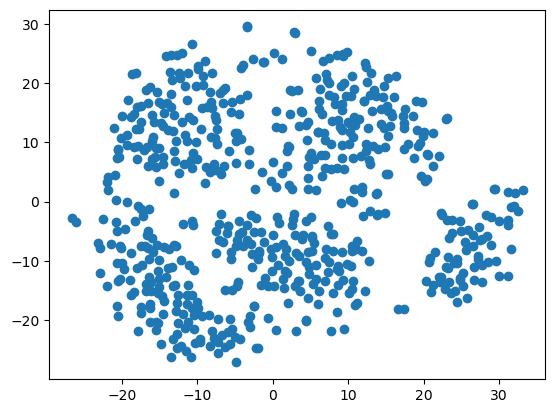

In [8]:
# t-SNE is used to create a plot of the reduced features
# The first column of transformed features
X['x'] = tsne_features[:,0]
# The second column of transformed features
X['y'] = tsne_features[:,1]
# Visualize the clusters
plt.scatter(X['x'], X['y'])
plt.show()

# Perform a Cluster Analysis with K-means

In [9]:
# A K-means model is created, using a for loop to create a list of inertias for each k from 1 to 10, inclusive
inertia = []
k = list(range(1, 11))

for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()


c:\Users\wolte\anaconda3\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "


,k,inertia
0,1,254372.970441
1,2,158272.396347
2,3,94060.004894
3,4,64313.225595
4,5,48007.307679


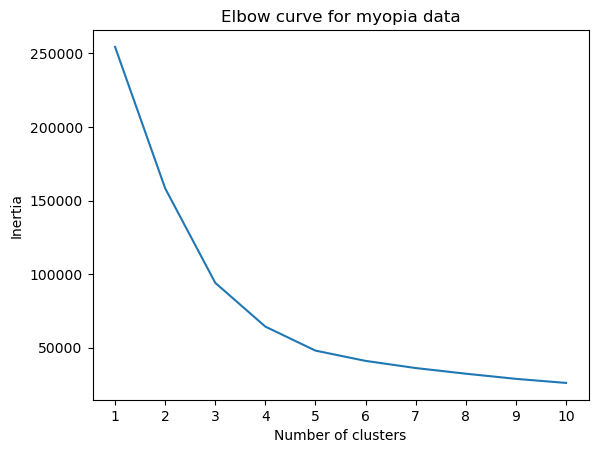

In [10]:
# A plot is created to examine any elbows that exist
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for myopia data')
plt.show()

In [12]:
# Create a KneeLocator object to find the elbow point in the plot
kl = KneeLocator(range(1, 11), inertia, curve='convex', direction='decreasing')

# Use the elbow attribute of the KneeLocator object to find the index of the elbow point, which corresponds to the best k value
best_k = kl.elbow

# Print the best k value
print('The best k value is:', best_k)

The best k value is: 4


# Make a Recommendation

Based on my findings, I would recommened patients be clustered into 4 clusters. Looking at the elbow curve for the k-means model, it is not readily apparnet how many clusters would be best, though it appears to be somewhere between 3 and 5. I found the KneeLocator tool to examine the best k-value, and after importing and running, 4 is confirmed to be the best number of clusters for this dataset.